In [1]:
import sys
import os
import pandas as pd

sys.path.insert(0,'/home/hyunny88/projects/auto-trading/')
os.chdir('/home/hyunny88/projects/auto-trading/')
os.path.abspath(os.curdir)

'/home/hyunny88/projects/auto-trading'

In [2]:
from autotrading.db.mongodb import mongodb_handler
mongodb = mongodb_handler.MongoDBHandler("remote", "coiner", "price_info")

result = mongodb.find_items({"year":2018,"month":1,"day":28,"hour":13})

result = list(result)
df = pd.DataFrame(result, columns=["timestamp", "coin", "amount","price","hour","minute","second"])

In [3]:
pd.set_option('precision',12)
df

,timestamp,coin,amount,price,hour,minute,second
0,1.517112061065e+09,etc_krw,72.077224513848,33940,13,1,1
1,1.517112025633e+09,eth_krw,2.068674460000,1267050,13,0,25
2,1.517112014859e+09,eth_krw,10.450000000000,1268750,13,0,14
3,1.517112006010e+09,eth_krw,0.003286900000,1266950,13,0,6
4,1.517112025393e+09,btc_krw,0.239455430000,12932000,13,0,25
5,1.517112012750e+09,btc_krw,0.512997340000,12895500,13,0,12
6,1.517112056702e+09,xrp_krw,1885.934505000000,1367,13,0,56
7,1.517112056583e+09,xrp_krw,100.000000000000,1367,13,0,56
8,1.517112056466e+09,xrp_krw,11.000000000000,1367,13,0,56
9,1.517112056348e+09,xrp_krw,8500.000000000000,1368,13,0,56


In [4]:
df['amount'] = df['amount'].astype(float)
df['price'] = df['price'].astype(float)

import matplotlib.pyplot as plt
plt.figure()
df[df.coin=='btc_krw'].plot(x='timestamp',y='price')

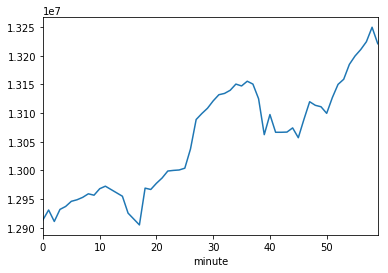

In [5]:
df[df.coin=='btc_krw'].groupby('minute').mean()['price'].plot()

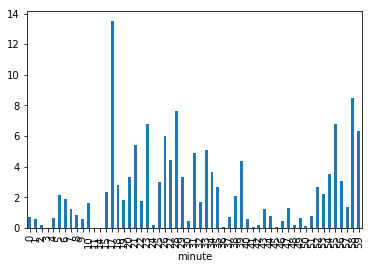

In [6]:
df[df.coin=='btc_krw'].groupby('minute').sum()['amount'].plot(kind='bar')

In [7]:
df[(df.coin=='btc_krw') | (df.coin=='eth_krw')].pivot_table(index='minute', columns='coin', values='price', aggfunc='mean')

coin,btc_krw,eth_krw
minute,,
0,1.291375000000e+07,1.267583333333e+06
1,1.293100000000e+07,1.268670000000e+06
2,1.291100000000e+07,1.268858333333e+06
3,1.293200000000e+07,1.267240000000e+06
4,1.293716666667e+07,1.271198611111e+06
5,1.294611111111e+07,1.274666666667e+06
6,1.294880000000e+07,1.276204545455e+06
7,1.295300000000e+07,1.276775000000e+06
8,1.295920000000e+07,1.276134615385e+06


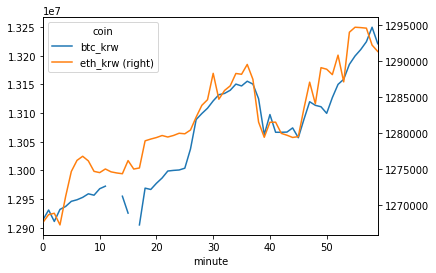

In [8]:
df[(df.coin=='btc_krw') | (df.coin=='eth_krw')].pivot_table(index='minute', columns='coin', values='price', aggfunc='mean').plot(secondary_y=['eth_krw'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e99a56048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f7e99a20908>]], dtype=object)

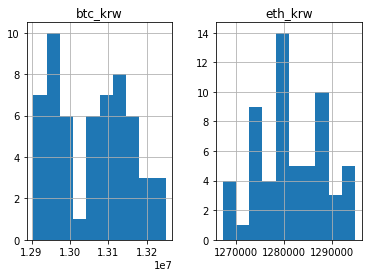

In [9]:
df[(df.coin=='btc_krw') | (df.coin=='eth_krw')].pivot_table(index='minute', columns='coin', values='price', aggfunc='mean').hist()